<h1> Patient Readmission Prediction </h1>

<p>
Predicting those patients that are likely to be readmitted may significantly reduce the cost of healthcare and improve patient outcome.  This notebook is focused on evaluating patients with the pre-existing condition of diabetes.  The objective is to quickly assimilate from the reference research paper, cleanse the data, prepare the features, and build rudimentary data science models.  The focus is on "speed" of assimilation, as many other references and notebooks have developed data science models and performed evaluations. A near-future revision of the notebook shall include a comparison with automl, as that's the final target.<br>

<h3 id="dataengr">Data Requirements and Collection</h3>
<p>
<h5 id="assumption">Data Requirements</h5>
    For conceptual demonstration, an open source dataset for patient admission shall suffice<br>
<h5 id="approach">Data Collection</h5>
Leverage diabetic dataset from UCI for concept illustration<br>
<ul>
    <li>data source: <a href="https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008" target="_blank">https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008</a></li>
    <li> research paper: <a href="https://www.hindawi.com/journals/bmri/2014/781670/"
                            target="_blank">https://www.hindawi.com/journals/bmri/2014/781670/"</a></li>                         
</ul>
</p>
    
</p>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
diabetes_df = pd.read_csv("diabetic_data.csv")
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
diabetes_df.shape

(101766, 50)

In [4]:
diabetes_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

<h3> Missing values </h3>
Analyze all the columns identifying missing values represented as NaN

In [6]:
# In the dataset replace all "?" with NaN
import numpy as np

# replace "?" to NaN
diabetes_df.replace("?", np.nan, inplace = True)
diabetes_df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
missing_data = diabetes_df.isnull()
missing_data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Print all columns, and determine those columns with a True where no data exists and must be either replaced or dropped
for column in missing_data.columns.values.tolist():
        print("column #:", column, "", diabetes_df.loc[0, column])
        print (missing_data[column].value_counts())
        print("") 

column #: encounter_id  2278392
False    101766
Name: encounter_id, dtype: int64

column #: patient_nbr  8222157
False    101766
Name: patient_nbr, dtype: int64

column #: race  Caucasian
False    99493
True      2273
Name: race, dtype: int64

column #: gender  Female
False    101766
Name: gender, dtype: int64

column #: age  [0-10)
False    101766
Name: age, dtype: int64

column #: weight  nan
True     98569
False     3197
Name: weight, dtype: int64

column #: admission_type_id  6
False    101766
Name: admission_type_id, dtype: int64

column #: discharge_disposition_id  25
False    101766
Name: discharge_disposition_id, dtype: int64

column #: admission_source_id  1
False    101766
Name: admission_source_id, dtype: int64

column #: time_in_hospital  1
False    101766
Name: time_in_hospital, dtype: int64

column #: payer_code  nan
False    61510
True     40256
Name: payer_code, dtype: int64

column #: medical_specialty  Pediatrics-Endocrinology
False    51817
True     49949
Name: medic

<h3> Data Exploration </h3>

In [12]:
diabetes_df["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [13]:
diabetes_df["gender"].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [14]:
diabetes_df["age"].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [34]:
diabetes_df[["admission_type_id"]] = diabetes_df[["admission_type_id"]].astype("int")

Text(0.5, 1.0, 'admission_type_id bins')

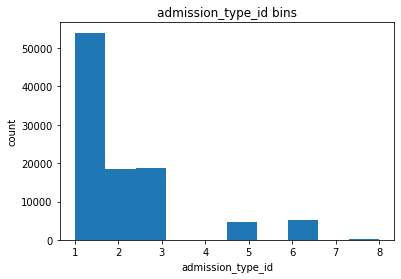

In [37]:
# Plot histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(diabetes_df["admission_type_id"])

# set x/y labels and plot title
plt.pyplot.xlabel("admission_type_id")
plt.pyplot.ylabel("count")
plt.pyplot.title("admission_type_id bins")

In [35]:
diabetes_df[["discharge_disposition_id"]] = diabetes_df[["discharge_disposition_id"]].astype("int")

Text(0.5, 1.0, 'discharge_disposition_id bins')

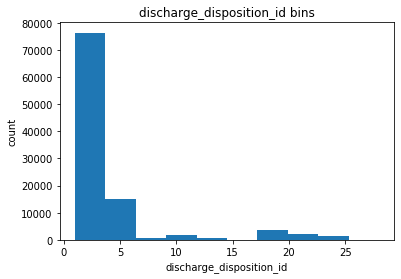

In [39]:
# Plot histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(diabetes_df["discharge_disposition_id"])

# set x/y labels and plot title
plt.pyplot.xlabel("discharge_disposition_id")
plt.pyplot.ylabel("count")
plt.pyplot.title("discharge_disposition_id bins")

In [36]:
diabetes_df[["admission_source_id"]] = diabetes_df[["admission_source_id"]].astype("int")

Text(0.5, 1.0, 'admission_source_id bins')

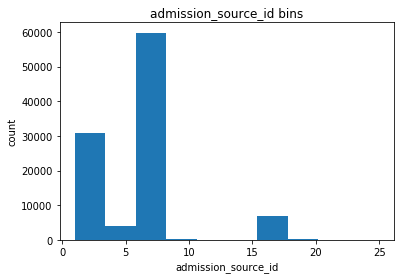

In [38]:
# Plot histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(diabetes_df["admission_source_id"])

# set x/y labels and plot title
plt.pyplot.xlabel("admission_source_id")
plt.pyplot.ylabel("count")
plt.pyplot.title("admission_source_id bins")

In [18]:
diabetes_df["time_in_hospital"].value_counts()

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

In [19]:
diabetes_df["num_lab_procedures"].value_counts()

1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
107       1
118       1
129       1
120       1
121       1
Name: num_lab_procedures, Length: 118, dtype: int64

In [20]:
diabetes_df["num_procedures"].value_counts()

0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: num_procedures, dtype: int64

In [21]:
diabetes_df["num_medications"].value_counts()

13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
74       1
79       1
81       1
Name: num_medications, Length: 75, dtype: int64

In [24]:
diabetes_df["number_outpatient"].value_counts()

0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
23        2
25        2
26        2
29        2
33        2
35        2
36        2
40        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64

In [23]:
diabetes_df["number_emergency"].value_counts()

0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19        4
20        4
14        3
15        3
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64

In [22]:
diabetes_df["number_inpatient"].value_counts()

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64

In [28]:
diabetes_df["number_diagnoses"].value_counts()

9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

In [40]:
diabetes_df["A1Cresult"].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [29]:
diabetes_df["insulin"].value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [27]:
diabetes_df["change"].value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

In [26]:
diabetes_df["diabetesMed"].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [25]:
diabetes_df["readmitted"].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

<h3> Data Preparation </h3>

Replace categorical variables, with one hot encoding, drop unnecessary data, replace nulls.

In [44]:
dataprep_diabetes_df = diabetes_df

In [45]:
dataprep_diabetes_df = dataprep_diabetes_df.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [46]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
        'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
        'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [47]:
dataprep_diabetes_df = dataprep_diabetes_df.drop(meds, axis = 1)

In [53]:
addl_col = ['num_lab_procedures', 'diag_1', 'diag_2', 'diag_3']

In [ ]:
dataprep_diabetes_df = dataprep_diabetes_df.drop(addl_col, axis = 1)

In [57]:
dataprep_diabetes_df.info

<bound method DataFrame.info of         encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6              

In [58]:
dataprep_diabetes_df['race'] = dataprep_diabetes_df['race'].replace('Caucasian', 1)

In [59]:
dataprep_diabetes_df['race'] = dataprep_diabetes_df['race'].replace('AfricanAmerican', 0)

In [60]:
dataprep_diabetes_df['race'] = dataprep_diabetes_df['race'].replace('Hispanic', 2)

In [61]:
dataprep_diabetes_df['race'] = dataprep_diabetes_df['race'].replace('Other', 3)

In [62]:
dataprep_diabetes_df['race'] = dataprep_diabetes_df['race'].replace('Asian', 4)

In [63]:
dataprep_diabetes_df['gender'] = dataprep_diabetes_df['gender'].replace('Female', 0)

In [64]:
dataprep_diabetes_df['gender'] = dataprep_diabetes_df['gender'].replace('Male', 1)

In [74]:
# 3 individuals in the dataset were unknown/invalid; assumption = replace with 0 which is female based upon slightly greater distribution of females to males
dataprep_diabetes_df['gender'] = dataprep_diabetes_df['gender'].replace('Unknown/Invalid', 0)

In [65]:
for age in range(0,10):
    dataprep_diabetes_df['age'] = dataprep_diabetes_df['age'].replace('['+str(10*age)+'-'+str(10*(age+1))+')', age+1)

In [66]:
dataprep_diabetes_df['max_glu_serum'] = dataprep_diabetes_df['max_glu_serum'].replace('>200', 1)
dataprep_diabetes_df['max_glu_serum'] = dataprep_diabetes_df['max_glu_serum'].replace('>300', 1)
dataprep_diabetes_df['max_glu_serum'] = dataprep_diabetes_df['max_glu_serum'].replace('Norm', 0)
dataprep_diabetes_df['max_glu_serum'] = dataprep_diabetes_df['max_glu_serum'].replace('None', -1)

dataprep_diabetes_df['A1Cresult'] = dataprep_diabetes_df['A1Cresult'].replace('>7', 1)
dataprep_diabetes_df['A1Cresult'] = dataprep_diabetes_df['A1Cresult'].replace('>8', 1)
dataprep_diabetes_df['A1Cresult'] = dataprep_diabetes_df['A1Cresult'].replace('Norm', 0)
dataprep_diabetes_df['A1Cresult'] = dataprep_diabetes_df['A1Cresult'].replace('None', -1)

dataprep_diabetes_df['change'] = dataprep_diabetes_df['change'].replace('Ch', 1)
dataprep_diabetes_df['change'] = dataprep_diabetes_df['change'].replace('No', 0)

dataprep_diabetes_df['diabetesMed'] = dataprep_diabetes_df['diabetesMed'].replace('Yes', 1)
dataprep_diabetes_df['diabetesMed'] = dataprep_diabetes_df['diabetesMed'].replace('No', 0)

dataprep_diabetes_df['readmitted'] = dataprep_diabetes_df['readmitted'].replace('>30', 2)
dataprep_diabetes_df['readmitted'] = dataprep_diabetes_df['readmitted'].replace('<30', 1)
dataprep_diabetes_df['readmitted'] = dataprep_diabetes_df['readmitted'].replace('NO', 0)

In [67]:
dataprep_diabetes_df.info

<bound method DataFrame.info of         encounter_id  patient_nbr  race gender  age  admission_type_id  \
0            2278392      8222157   1.0      0    1                  6   
1             149190     55629189   1.0      0    2                  1   
2              64410     86047875   0.0      0    3                  1   
3             500364     82442376   1.0      1    4                  1   
4              16680     42519267   1.0      1    5                  1   
...              ...          ...   ...    ...  ...                ...   
101761     443847548    100162476   0.0      1    8                  1   
101762     443847782     74694222   0.0      0    9                  1   
101763     443854148     41088789   1.0      1    8                  1   
101764     443857166     31693671   1.0      0    9                  2   
101765     443867222    175429310   1.0      1    8                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0   

In [76]:
dataprep_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      99493 non-null   float64
 3   gender                    101766 non-null  int64  
 4   age                       101766 non-null  int64  
 5   admission_type_id         101766 non-null  int64  
 6   discharge_disposition_id  101766 non-null  int64  
 7   admission_source_id       101766 non-null  int64  
 8   time_in_hospital          101766 non-null  int64  
 9   num_procedures            101766 non-null  int64  
 10  num_medications           101766 non-null  int64  
 11  number_outpatient         101766 non-null  int64  
 12  number_emergency          101766 non-null  int64  
 13  number_inpatient          101766 non-null  i

In [81]:
dataprep_diabetes_df["race"].value_counts()

1.0    76099
0.0    19210
2.0     2037
3.0     1506
4.0      641
Name: race, dtype: int64

In [99]:
dataprep_diabetes_df["race"].isnull().sum()

2273

In [101]:
dataprep_diabetes_df["race"].fillna(1, inplace = True)

In [102]:
dataprep_diabetes_df["race"].isnull().sum()

0

In [105]:
dataprep_diabetes_df[["race"]] = dataprep_diabetes_df[["race"]].astype("int")

In [106]:
dataprep_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   patient_nbr               101766 non-null  int64
 2   race                      101766 non-null  int64
 3   gender                    101766 non-null  int64
 4   age                       101766 non-null  int64
 5   admission_type_id         101766 non-null  int64
 6   discharge_disposition_id  101766 non-null  int64
 7   admission_source_id       101766 non-null  int64
 8   time_in_hospital          101766 non-null  int64
 9   num_procedures            101766 non-null  int64
 10  num_medications           101766 non-null  int64
 11  number_outpatient         101766 non-null  int64
 12  number_emergency          101766 non-null  int64
 13  number_inpatient          101766 non-null  int64
 14  number_diagnoses    

<h3 id="model">Modeling building and evaluation</h3>

In [112]:
dataprep_diabetes_df.corr()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
encounter_id,1.000000,0.512028,0.098554,0.005992,0.071716,-0.158961,-0.132876,-0.112402,-0.062221,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149,-0.149315,0.002402,0.096372,0.051817,-0.038416
patient_nbr,0.512028,1.000000,0.150156,0.006617,0.070991,-0.011128,-0.136814,-0.032568,-0.024092,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847,-0.087298,-0.008255,0.054842,0.017232,0.077315
race,0.098554,0.150156,1.000000,0.056783,0.085416,0.087139,-0.017382,0.015193,-0.023481,0.022285,0.001559,0.023141,-0.023169,-0.030218,0.032792,0.045082,0.004838,0.013248,0.001578,-0.014853
gender,0.005992,0.006617,0.056783,1.000000,-0.050584,0.014623,-0.020946,-0.003822,-0.029890,0.059896,-0.022030,-0.011448,-0.021058,-0.014585,-0.003320,-0.002486,0.022738,0.014858,0.015932,-0.018427
age,0.071716,0.070991,0.085416,-0.050584,1.000000,-0.007209,0.114323,0.044696,0.107515,-0.030104,0.041847,0.023724,-0.087291,-0.042861,0.242597,0.029727,-0.128407,-0.036019,-0.022601,0.026816
admission_type_id,-0.158961,-0.011128,0.087139,0.014623,-0.007209,1.000000,0.083483,0.106654,-0.012500,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126,0.382406,-0.046977,0.007274,-0.000310,-0.001342
discharge_disposition_id,-0.132876,-0.136814,-0.017382,-0.020946,0.114323,0.083483,1.000000,0.018193,0.162748,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891,0.044663,-0.021016,-0.012307,-0.028887,-0.033281
admission_source_id,-0.112402,-0.032568,0.015193,-0.003822,0.044696,0.106654,0.018193,1.000000,-0.006965,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114,0.444999,0.003318,0.002435,0.001500,0.041193
time_in_hospital,-0.062221,-0.024092,-0.023481,-0.029890,0.107515,-0.012500,0.162748,-0.006965,1.000000,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186,0.022651,0.060527,0.109173,0.062520,0.040309
num_procedures,-0.014225,-0.015570,0.022285,0.059896,-0.030104,0.129888,0.015921,-0.135400,0.191472,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734,-0.073352,-0.011813,0.004448,-0.006821,-0.044150


<h3> Linear Regression </h3>

Simplistic approach, train a linear regressiion model, view the plots of the training and testing data.  There are many notebooks found on the Web that have included Random Forest, SVM, Neural Network, and others.  Our objective here is simplicity, and a near-future comparison to automl, where the comparison is based upon not only the accuracy of the model, but more importantly, the time incurred preparing the data, i.e. the feature engineering including pipeline activities.

In [113]:
import pandas as pd
import numpy as np

In [114]:
model_diabetes_df = dataprep_diabetes_df

In [116]:
y_data = model_diabetes_df['readmitted']
x_data = model_diabetes_df.drop('readmitted',axis=1)

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [118]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

In [119]:
lre.fit(x_train[['age', 'time_in_hospital', 'A1Cresult', 'change']], y_train)
yhat_train = lre.predict(x_train[['age', 'time_in_hospital', 'A1Cresult', 'change']])
yhat_test = lre.predict(x_test[['age', 'time_in_hospital', 'A1Cresult', 'change']])

In [120]:
yhat_train[0:5]

array([0.84891185, 0.80471226, 0.78777264, 0.73077789, 0.87892099])

In [121]:
yhat_test[0:5]

array([0.86561349, 0.81866473, 0.79086515, 0.75470738, 0.81479463])

In [122]:
# Plot linear regression model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/opt/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [123]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Readmission')
    plt.ylabel('Proportion of Patients')

    plt.show()
    plt.close()

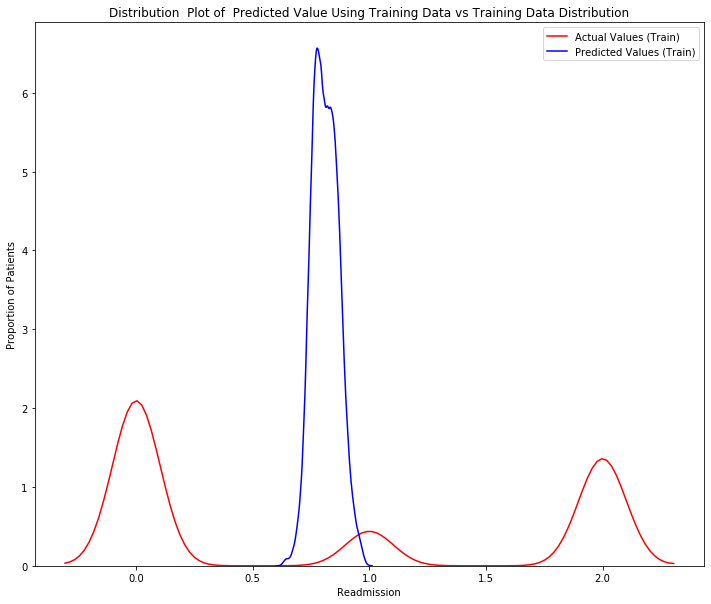

In [124]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

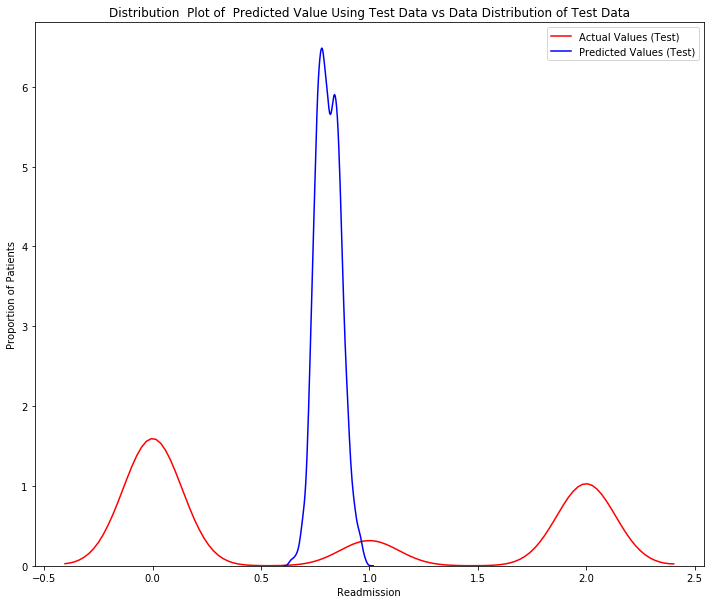

In [125]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)